### PROBLEM STATEMENT

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## DATA 

### IMPORT LIBRARIES

In [627]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# EDA

In [628]:
customertraindata=pd.read_csv("train.csv")

In [629]:
customertraindata.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# EDA

Univariate Analysis

In [630]:
customertraindata.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

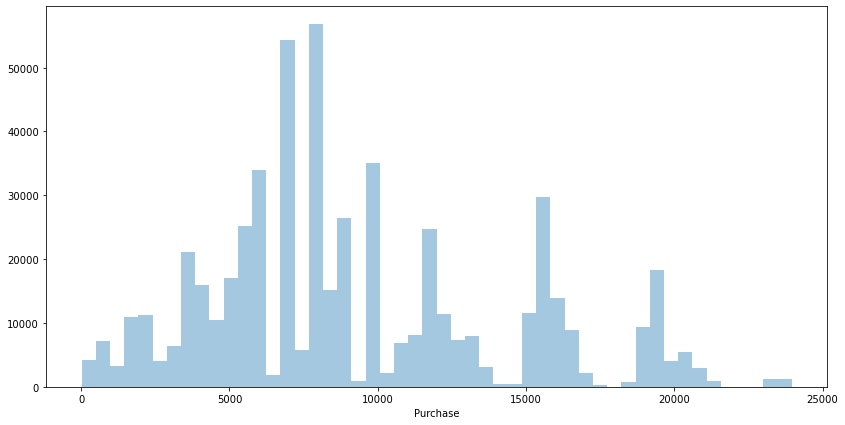

In [631]:
plt.figure(figsize=(14,7))
sns.distplot(customertraindata.Purchase, kde=False);

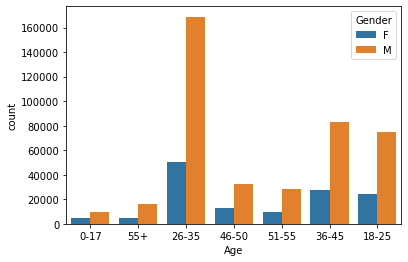

In [632]:
sns.countplot(x='Age',hue='Gender', data=customertraindata);

Age between 26-35 are more likely to do shopping.

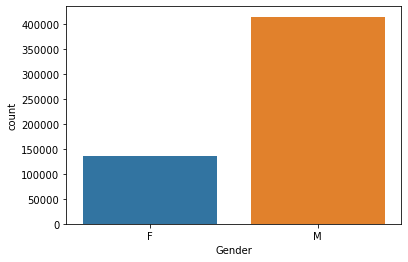

In [633]:
sns.countplot(x='Gender', data=customertraindata);

And male is more likely to go out for shopping.

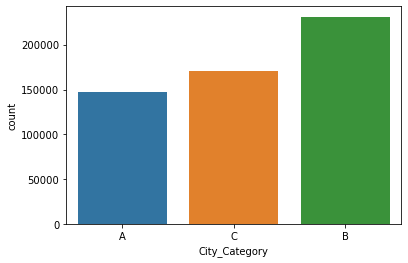

In [634]:
sns.countplot(x='City_Category', data=customertraindata);

Customer who are living in B are more likely to go out for shopping

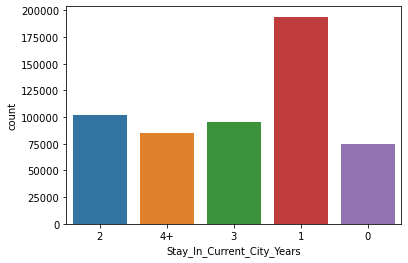

In [635]:
sns.countplot(x='Stay_In_Current_City_Years', data=customertraindata);

People who are living in city for more than 1 year are more likely to go out for shopping

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

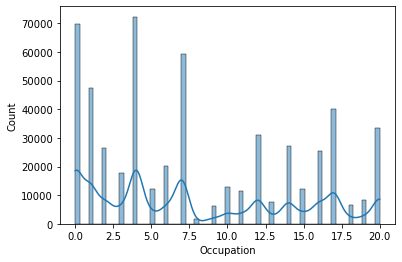

In [636]:
sns.histplot(customertraindata.Occupation,kde=True)

In [637]:
customertraindata.Occupation.value_counts().sort_values(ascending=False)

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

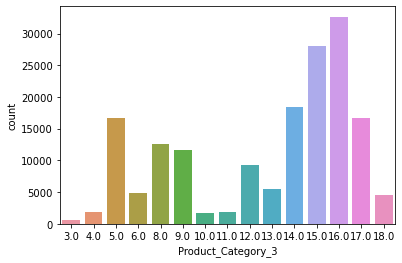

In [638]:
sns.countplot(x='Product_Category_3', data=customertraindata);

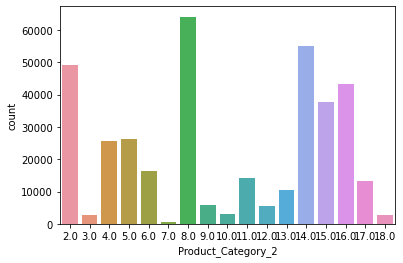

In [639]:
sns.countplot(x='Product_Category_2', data=customertraindata);

<AxesSubplot:>

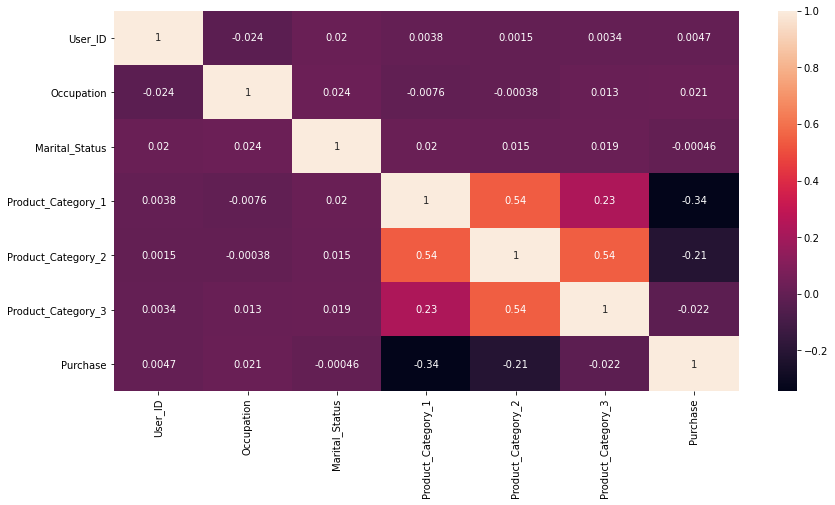

In [640]:
plt.figure(figsize=(14,7))
corr=customertraindata.corr()
sns.heatmap(corr,annot=True)

In [641]:
customertraindata.groupby('Age')['Purchase'].mean().sort_values(ascending=True)

Age
0-17     8933.464640
18-25    9169.663606
46-50    9208.625697
26-35    9252.690633
36-45    9331.350695
55+      9336.280459
51-55    9534.808031
Name: Purchase, dtype: float64

## Importing test data

In [642]:
customertestdata=pd.read_csv("test.csv")

In [643]:
customertestdata.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [644]:
print(customertraindata.shape) # traindata having 550068 records and 12 features includes target variable
print(customertestdata.shape) # testdata having 233599 records and 11 features does not includes target variable

(550068, 12)
(233599, 11)


In [645]:
customertraindata.dtypes  # datatypes are int,object,float

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [646]:
customertestdata.dtypes  # datatypes are int,object,float

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [647]:
# checking for missing value for train data
customertraindata.isnull().sum().sort_values(ascending=False)  # Product_Category_3(69.6%) and Product_Category_2(31.5%) having more missing values

Product_Category_3            383247
Product_Category_2            173638
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

In [648]:
# checking for missing value for test data
customertestdata.isnull().sum().sort_values(ascending=False)  # Product_Category_3(69.5%) and Product_Category_2(30.9%) having more missing values

Product_Category_3            162562
Product_Category_2             72344
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

In [649]:
customertraindata.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [650]:
customertestdata.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

As both dataset have missing value in same features so we can concat both dataset customertraindata & customertestdata for data preprocessing and remove missing values. In order to concat datasaet column's should be same hence we need to remove purchase columns from train dataset.

In [651]:
customertraindata1=customertraindata.drop('Purchase',axis=1)

In [652]:
customertraindata1.columns  # we can see Purchase column is not there now.

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [653]:
#Let's combine customertestdata and customertraindata1

In [654]:
combinecustomerdata=pd.concat([customertraindata1,customertestdata],axis=0)

In [655]:
combinecustomerdata.isnull().sum().sort_values(ascending=False)

Product_Category_3            545809
Product_Category_2            245982
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

Now we have combinecustomerdata dataset which is combination of train and test data and we will be performing Data preprocessing on this dataset and after that we will separate.

Separate Object and numerical datatype and then accordingly perform operation to remove missing value.

In [656]:
combinecustomerdata_object=combinecustomerdata.select_dtypes(include='object')
combinecustomerdata_numerical=combinecustomerdata.select_dtypes(include='number')

In [657]:
print(combinecustomerdata_object.columns)

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


In [658]:
print(combinecustomerdata_numerical.columns)

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


## Handling Missing values for Categorical variable

In [659]:
combinecustomerdata_object.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [660]:
combinecustomerdata_object.isnull().sum().sort_values(ascending=False)

Stay_In_Current_City_Years    0
City_Category                 0
Age                           0
Gender                        0
Product_ID                    0
dtype: int64

we can see in categorical variables there are no missing values hence we will keep it as it is.

## Handling Missing values for Numerical variable

In [661]:
combinecustomerdata_numerical.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,10,0,3,NaN,NaN
1,1000001,10,0,1,6.0,14.0
2,1000001,10,0,12,NaN,NaN
3,1000001,10,0,12,14.0,NaN
4,1000002,16,0,8,NaN,NaN


In [662]:
combinecustomerdata_numerical.isnull().sum().sort_values(ascending=False)

Product_Category_3    545809
Product_Category_2    245982
Product_Category_1         0
Marital_Status             0
Occupation                 0
User_ID                    0
dtype: int64

In [663]:
#Let's check importance of these feature Product_Category_2 and Product_Category_3 
#we will add another feature if value is present then update it as 1 and if it is NaN update it as 0 for checking variable importance .

In [664]:
combinecustomerdata_numerical['Product_Category_2_test'] = np.where(combinecustomerdata_numerical['Product_Category_2'].isnull(), 0, 1)
combinecustomerdata_numerical['Product_Category_3_test'] = np.where(combinecustomerdata_numerical['Product_Category_3'].isnull(), 0, 1)

In [665]:
print('count of  0 consider as nan value in Product_Category_2_test :{}'.format(combinecustomerdata_numerical['Product_Category_2_test'].value_counts()[0]))
print('count of  0 consider as nan value in Product_Category_3_test:{}'.format(combinecustomerdata_numerical['Product_Category_3_test'].value_counts()[0]))

count of  0 consider as nan value in Product_Category_2_test :245982
count of  0 consider as nan value in Product_Category_3_test:545809


<AxesSubplot:xlabel='Product_Category_2_test', ylabel='count'>

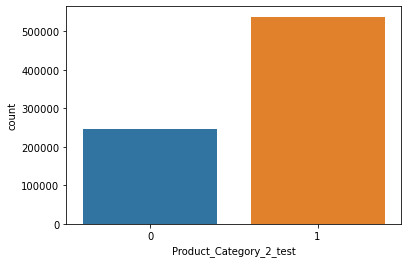

In [666]:
sns.countplot(x='Product_Category_2_test',data=combinecustomerdata_numerical)  # in Product_Category_2_test nan values are less 

<AxesSubplot:xlabel='Product_Category_3_test', ylabel='count'>

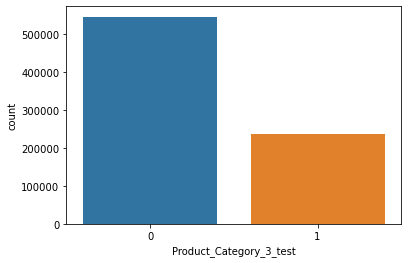

In [667]:
sns.countplot(x='Product_Category_3_test',data=combinecustomerdata_numerical)# nan values are in large number

check the correlation of both feature with target variable and check whether these feature are important or not.

In [668]:
combinecustomerdata_numerical.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category_2_test,Product_Category_3_test
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,783667.000000,783667.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,0.686114,0.303519
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,0.464071,0.459778
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,0.000000,0.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,1.000000,0.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,1.000000,1.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,1.000000,1.000000


<AxesSubplot:xlabel='Product_Category_3', ylabel='Count'>

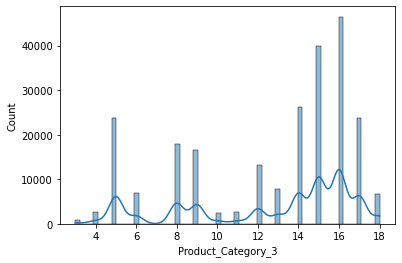

In [669]:
sns.histplot(x='Product_Category_3',data=combinecustomerdata_numerical,kde=True)

In [670]:
combinecustomerdata_numerical.drop(['Product_Category_2_test','Product_Category_3_test'],axis=1,inplace=True)

In [671]:
from sklearn.impute import SimpleImputer

In [672]:
imputer=SimpleImputer(missing_values=np.nan,
                            strategy='median')

In [673]:
combinecustomerdata_numerical_imputer=imputer.fit_transform(combinecustomerdata_numerical)

In [674]:
numericlabels=combinecustomerdata_numerical.select_dtypes(include=np.number).columns

In [675]:
combinecustomerdata_numerical_final=pd.DataFrame(combinecustomerdata_numerical_imputer,columns=numericlabels)

In [676]:
combinecustomerdata_numerical_final.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001.0,10.0,0.0,3.0,9.0,14.0
1,1000001.0,10.0,0.0,1.0,6.0,14.0
2,1000001.0,10.0,0.0,12.0,9.0,14.0
3,1000001.0,10.0,0.0,12.0,14.0,14.0
4,1000002.0,16.0,0.0,8.0,9.0,14.0


In [677]:
combinecustomerdata_numerical_final.isnull().sum()

User_ID               0
Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
dtype: int64

In [678]:
#dropping user id and Customer id from combinecustomerdata_object and combinecustomerdata_numerical_final dataset
combinecustomerdata_object.drop('Product_ID',axis=1,inplace=True)
combinecustomerdata_numerical_final.drop('User_ID',axis=1,inplace=True)

## Handling Categorical Feature

In [679]:
combinecustomerdata_object.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years
0,F,0-17,A,2
1,F,0-17,A,2
2,F,0-17,A,2
3,F,0-17,A,2
4,M,55+,C,4+


In [680]:
#Gender
gender_dict={'M':1,'F':0}
combinecustomerdata_object['Gender']=combinecustomerdata_object.Gender.map(gender_dict)


In [681]:
#Feature gender and City_Category has changed to numerical using get_dummies
combinecustomerdata_object=pd.get_dummies(combinecustomerdata_object,columns=['City_Category'],drop_first=True)

In [682]:
#Converting Stay_In_Current_City_Years into same just remove 4+ with 4
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
output=le.fit_transform(combinecustomerdata_object['Stay_In_Current_City_Years'])
#combinecustomerdata_object['Stay_In_Current_City_Years']=np.where(combinecustomerdata_object['Stay_In_Current_City_Years']=='4+',4,combinecustomerdata_object['Stay_In_Current_City_Years'])

In [683]:
combinecustomerdata_object['Stay_In_Current_City_Years']=pd.DataFrame(output)

In [684]:
#Converting Stay_In_Current_City_Years datatype as numerical
#combinecustomerdata_object['Stay_In_Current_City_Years']=combinecustomerdata_object['Stay_In_Current_City_Years'].astype('int64')

<AxesSubplot:xlabel='Age', ylabel='count'>

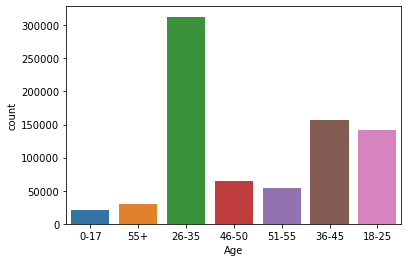

In [685]:
sns.countplot('Age',data=combinecustomerdata_object)

#combinecustomerdata_object.iloc[4]['Age'].split('-')
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334

In [686]:
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='26-35',30.5,combinecustomerdata_object['Age'])
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='36-45',40.5,combinecustomerdata_object['Age'])
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='18-25',21.5,combinecustomerdata_object['Age'])
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='46-50',48,combinecustomerdata_object['Age'])
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='51-55',53,combinecustomerdata_object['Age'])
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='55+',55,combinecustomerdata_object['Age'])
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='0-17',8.5,combinecustomerdata_object['Age'])

In [687]:
combinecustomerdata_object['Age']=combinecustomerdata_object['Age'].astype('int64')

In [688]:
combinecustomerdata_object.head(10)

,Gender,Age,Stay_In_Current_City_Years,City_Category_B,City_Category_C
0,0,8,2,0,0
1,0,8,2,0,0
2,0,8,2,0,0
3,0,8,2,0,0
4,1,55,4,0,1
5,1,30,3,0,0
6,1,48,2,1,0
7,1,48,2,1,0
8,1,48,2,1,0
9,1,30,1,0,0


In [689]:
combinecustomerdata_object.columns

Index(['Gender', 'Age', 'Stay_In_Current_City_Years', 'City_Category_B',
       'City_Category_C'],
      dtype='object')

In [690]:
combinecustomerdata_numerical_final.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [691]:
#Combine both Categorical and Numerical Features 
print(combinecustomerdata_object.shape)
print(combinecustomerdata_numerical_final.shape)

(783667, 5)
(783667, 5)


In [692]:
combinecustomerdata_object.reset_index(drop=True, inplace=True)
combinecustomerdata_numerical_final.reset_index(drop=True, inplace=True)

In [693]:
combinecustomerdata_object.isnull().sum()

Gender                        0
Age                           0
Stay_In_Current_City_Years    0
City_Category_B               0
City_Category_C               0
dtype: int64

In [694]:
combinecustomerdata_numerical_final.isnull().sum()

Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
dtype: int64

In [695]:
combinecustomerfinal=pd.concat([combinecustomerdata_object,combinecustomerdata_numerical_final],axis=1)

In [696]:
combinecustomerfinal.isnull().sum()

Gender                        0
Age                           0
Stay_In_Current_City_Years    0
City_Category_B               0
City_Category_C               0
Occupation                    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [697]:
combinecustomerfinal.dtypes

Gender                          int64
Age                             int64
Stay_In_Current_City_Years      int32
City_Category_B                 uint8
City_Category_C                 uint8
Occupation                    float64
Marital_Status                float64
Product_Category_1            float64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [698]:
print(customertraindata.shape) # no of rows in train data is 550068
print(customertestdata.shape)  # no of rows in test data is 233599


(550068, 12)
(233599, 11)


In [699]:
233599+550068  #hence total is 783667 which is same as preseent in combinecustomerfinal

783667

In [700]:
combinecustomerfinal.shape

(783667, 10)

In [701]:
combinecustomerfinal.columns

Index(['Gender', 'Age', 'Stay_In_Current_City_Years', 'City_Category_B',
       'City_Category_C', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [702]:
columuns=['Gender', 'Age', 'Stay_In_Current_City_Years', 'City_Category_B',
       'City_Category_C', 'Occupation', 'Marital_Status',
       'Product_Category_1','Product_Category_2', 'Product_Category_3']

In [703]:
# Standard Scaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler=StandardScaler()
normalize=MinMaxScaler()
normalizeData=normalize.fit_transform(combinecustomerfinal)
scaleddata=scaler.fit_transform(combinecustomerfinal)

In [704]:
combinecustomerfinal1=pd.DataFrame(normalizeData,columns=columuns)

In [705]:
combinecustomerfinal1

,Gender,Age,Stay_In_Current_City_Years,City_Category_B,City_Category_C,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.0,0.000000,0.50,0.0,0.0,0.50,0.0,0.105263,0.4375,0.733333
1,0.0,0.000000,0.50,0.0,0.0,0.50,0.0,0.000000,0.2500,0.733333
2,0.0,0.000000,0.50,0.0,0.0,0.50,0.0,0.578947,0.4375,0.733333
3,0.0,0.000000,0.50,0.0,0.0,0.50,0.0,0.578947,0.7500,0.733333
4,1.0,1.000000,1.00,0.0,1.0,0.80,0.0,0.368421,0.4375,0.733333
...,...,...,...,...,...,...,...,...,...,...
783662,0.0,0.468085,0.25,1.0,0.0,0.75,1.0,0.368421,0.4375,0.733333
783663,0.0,0.468085,0.50,1.0,0.0,0.75,1.0,0.210526,0.3750,0.733333
783664,0.0,0.468085,0.50,1.0,0.0,0.75,1.0,0.000000,0.1875,0.600000
783665,0.0,0.851064,0.50,0.0,1.0,0.05,0.0,0.473684,0.8750,0.733333


hence we have now combinecustomerfinal dataset which is final after handling Missing values and categorical variables

In [706]:
customerfinaltraindataset=combinecustomerfinal1.iloc[:550068]
print(customerfinaltraindataset.shape)
customerfinaltestdataset=combinecustomerfinal1.iloc[550068:783667]
print(customerfinaltestdataset.shape)

(550068, 10)
(233599, 10)


In [707]:
y=customertraindata.Purchase  # Single Dependent Variable(y) - y lower case
X=customerfinaltraindataset  # Single Dependent Variable(y) - y lower case
 # Independent Variables df (X) - X Upper Case

In [708]:
X.head()

,Gender,Age,Stay_In_Current_City_Years,City_Category_B,City_Category_C,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.105263,0.4375,0.733333
1,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.000000,0.2500,0.733333
2,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.578947,0.4375,0.733333
3,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.578947,0.7500,0.733333
4,1.0,1.0,1.0,0.0,1.0,0.8,0.0,0.368421,0.4375,0.733333


In [709]:
X_feature=X[['Age', 'Stay_In_Current_City_Years', 'Gender', 'City_Category_B',
       'City_Category_C', 'Occupation','Marital_Status', 'Product_Category_1','Product_Category_3']]
       

{'whiskers': [<matplotlib.lines.Line2D at 0x234f8080160>,
 'caps': [<matplotlib.lines.Line2D at 0x234df8f3d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x234d6363910>],
 'medians': [<matplotlib.lines.Line2D at 0x234f9a7f970>],
 'fliers': [<matplotlib.lines.Line2D at 0x234f982b2b0>],
 'means': []}

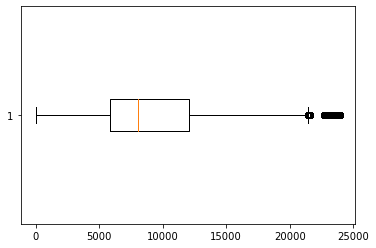

In [710]:
#plt.hist('Purchase',data=customertraindata)
plt.boxplot('Purchase',vert=False,data=customertraindata)

In [711]:
from sklearn.linear_model import LinearRegression

In [712]:
linreg=LinearRegression()

In [713]:
linreg.fit(X_feature,y)

LinearRegression()

In [714]:
linreg.score(X_feature,y)

0.12557719939849032

In [715]:
y_pred=linreg.predict(X_feature)

In [716]:
LinRegResidual=y-y_pred # Residual

## Feature Selection

In [717]:
#Feature Selection using Wrapper Method--eg backword selection

In [718]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

In [719]:

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

# Create a based model
rf = RandomForestRegressor()


In [721]:
# Fit the grid search to the data
#print(rf.fit(X_feature, y))
# Fit the grid search to the data for Min max
print(rf.fit(X_feature, np.log(y)))

RandomForestRegressor()


In [722]:
# for SND Method1
#print(rf.score(X_feature, y))

# for  Min max  Meyhod 2
print(rf.score(X_feature, np.log(y)))

0.7943802565857734


In [723]:
y_pred2=rf.predict(X_feature)


In [724]:
LinRegResidual2=y-y_pred2 # Residual

In [725]:
np.sqrt(np.mean(LinRegResidual2**2)) # RMSE

10530.048912112632

In [729]:
y_predfinal=rf.predict(customerfinaltestdataset.drop('Product_Category_2',axis=1))

In [733]:
y_final=np.exp(y_predfinal)

In [734]:
pd.DataFrame(y_final).to_csv('blackFridayPredictor.csv')